In [15]:
# Import necessary Libraries
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=RuntimeWarning)

import numpy as np
np.seterr(divide='ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [16]:
twow_ds = pd.read_excel(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\2W_2023.xlsx")

In [17]:
twow_ds.head()

,Date,2W Sales,Wholesale trading (mil),Retail trading(mil),M1,M3,BEI,IIP,PMI,CC,...,GVA_Cons,GVA_Manu,Evnt_Pos,Evnt_Negative,COSPI,Agriculture,Electricity,Construction,Trade,Real estate
0,2011-07-01,1232876,197985,20086,15817.0,68787790.0,121.5,100.31,52.1,115.0,...,607395.833333,1.110348e+06,0,0,2646905.3,8.969137e+05,154886.833333,740720.0,1.134989e+06,1.368753e+06
1,2011-08-01,1280735,197985,20086,15843.0,68787790.0,121.5,100.31,52.8,115.0,...,607395.833333,1.110348e+06,0,0,2518331.2,8.969137e+05,154886.833333,748050.0,1.134989e+06,1.368753e+06
2,2011-09-01,1408500,197985,20086,15828.0,68787790.0,121.5,100.31,53.1,115.0,...,607395.833333,1.110348e+06,0,0,2481991.1,8.969137e+05,154886.833333,755370.0,1.134989e+06,1.368753e+06
3,2011-10-01,1305923,215812,20882,15995.0,72213420.0,118.8,100.31,52.8,116.2,...,630319.266667,1.112248e+06,0,0,2728697.7,1.669885e+06,155409.833333,762690.0,1.163190e+06,1.134477e+06
4,2011-11-01,1326798,215812,20882,16152.0,72213420.0,118.8,100.31,51.3,116.2,...,630319.266667,1.112248e+06,0,0,2508661.5,1.669885e+06,155409.833333,770010.0,1.163190e+06,1.134477e+06


In [18]:
twow_ds.set_index('Date',inplace=True)

In [19]:
twow_ds.head()

,2W Sales,Wholesale trading (mil),Retail trading(mil),M1,M3,BEI,IIP,PMI,CC,WPI,...,GVA_Cons,GVA_Manu,Evnt_Pos,Evnt_Negative,COSPI,Agriculture,Electricity,Construction,Trade,Real estate
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-01,1232876,197985,20086,15817.0,68787790.0,121.5,100.31,52.1,115.0,100.0,...,607395.833333,1.110348e+06,0,0,2646905.3,8.969137e+05,154886.833333,740720.0,1.134989e+06,1.368753e+06
2011-08-01,1280735,197985,20086,15843.0,68787790.0,121.5,100.31,52.8,115.0,100.0,...,607395.833333,1.110348e+06,0,0,2518331.2,8.969137e+05,154886.833333,748050.0,1.134989e+06,1.368753e+06
2011-09-01,1408500,197985,20086,15828.0,68787790.0,121.5,100.31,53.1,115.0,100.0,...,607395.833333,1.110348e+06,0,0,2481991.1,8.969137e+05,154886.833333,755370.0,1.134989e+06,1.368753e+06
2011-10-01,1305923,215812,20882,15995.0,72213420.0,118.8,100.31,52.8,116.2,100.0,...,630319.266667,1.112248e+06,0,0,2728697.7,1.669885e+06,155409.833333,762690.0,1.163190e+06,1.134477e+06
2011-11-01,1326798,215812,20882,16152.0,72213420.0,118.8,100.31,51.3,116.2,100.0,...,630319.266667,1.112248e+06,0,0,2508661.5,1.669885e+06,155409.833333,770010.0,1.163190e+06,1.134477e+06


In [20]:
twow_ds.describe()

,2W Sales,Wholesale trading (mil),Retail trading(mil),M1,M3,BEI,IIP,PMI,CC,WPI,...,GVA_Cons,GVA_Manu,Evnt_Pos,Evnt_Negative,COSPI,Agriculture,Electricity,Construction,Trade,Real estate
count,1.380000e+02,138.000000,138.000000,138.000000,1.380000e+02,138.000000,138.000000,138.000000,138.000000,138.000000,...,1.380000e+02,1.380000e+02,138.000000,138.000000,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,1.380000e+02
mean,1.605584e+06,185978.543478,48646.956522,30552.672717,1.331579e+08,116.426087,96.694130,52.308696,91.861087,118.575362,...,9.794454e+05,1.789898e+06,0.057971,0.246377,8.492485e+06,1.793934e+06,262009.567391,3.546737e+06,1.910599e+06,2.313842e+06
std,3.476367e+05,75784.339575,21810.630156,11697.053552,4.247736e+07,8.359900,14.450357,3.549904,21.310029,13.297433,...,2.888863e+05,5.296924e+05,0.234540,0.432470,4.529210e+06,8.164108e+05,126797.873233,5.338179e+06,6.394495e+05,9.149918e+05
min,4.588000e+04,89455.000000,20086.000000,15817.000000,6.878779e+07,99.500000,7.000000,27.400000,39.370000,100.000000,...,5.835635e+05,1.110348e+06,0.000000,0.000000,2.404068e+06,8.969137e+05,154886.833333,4.358300e+05,1.114280e+06,1.134477e+06
25%,1.382484e+06,147332.000000,27706.000000,20984.500000,9.774040e+07,112.800000,92.025000,51.300000,88.000000,110.125000,...,7.722997e+05,1.329344e+06,0.000000,0.000000,4.852403e+06,1.225861e+06,173488.266667,8.072300e+05,1.423721e+06,1.649609e+06
50%,1.555334e+06,166365.500000,44431.500000,26860.500000,1.277520e+08,114.400000,97.500000,52.400000,100.650000,114.850000,...,9.066856e+05,1.706816e+06,0.000000,0.000000,8.178235e+06,1.525140e+06,215828.433333,8.980950e+05,1.816075e+06,2.021243e+06
75%,1.845777e+06,194972.000000,66021.000000,38533.600875,1.644893e+08,116.800000,101.900000,53.975000,105.500000,122.000000,...,1.158005e+06,2.005124e+06,0.000000,0.000000,1.043436e+07,1.962265e+06,263879.716667,1.023905e+06,2.119079e+06,2.710084e+06
max,2.424827e+06,497911.000000,92687.000000,55271.000000,2.185923e+08,139.300000,134.700000,58.900000,116.200000,155.400000,...,1.891312e+06,3.110668e+06,1.000000,1.000000,2.339049e+07,4.313515e+06,625937.600000,1.873292e+07,3.810171e+06,4.836027e+06


In [21]:
twow_ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 2011-07-01 to 2022-12-01
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2W Sales                 138 non-null    int64  
 1   Wholesale trading (mil)  138 non-null    int64  
 2   Retail trading(mil)      138 non-null    int64  
 3   M1                       138 non-null    float64
 4   M3                       138 non-null    float64
 5   BEI                      138 non-null    float64
 6   IIP                      138 non-null    float64
 7   PMI                      138 non-null    float64
 8   CC                       138 non-null    float64
 9   WPI                      138 non-null    float64
 10  GDP Rs. Millions         138 non-null    float64
 11  CMR                      138 non-null    float64
 12  Vloans                   138 non-null    float64
 13  Ind_freight              138 non-null    float64
 14  Diesel 

In [22]:
twow_ds.isnull().sum()

2W Sales                   0
Wholesale trading (mil)    0
Retail trading(mil)        0
M1                         0
M3                         0
BEI                        0
IIP                        0
PMI                        0
CC                         0
WPI                        0
GDP Rs. Millions           0
CMR                        0
Vloans                     0
Ind_freight                0
Diesel Rates               0
Season_Index               0
GVA Mining                 0
GVA_Cons                   0
GVA_Manu                   0
Evnt_Pos                   0
Evnt_Negative              0
COSPI                      0
Agriculture                0
Electricity                0
Construction               0
Trade                      0
Real estate                0
dtype: int64

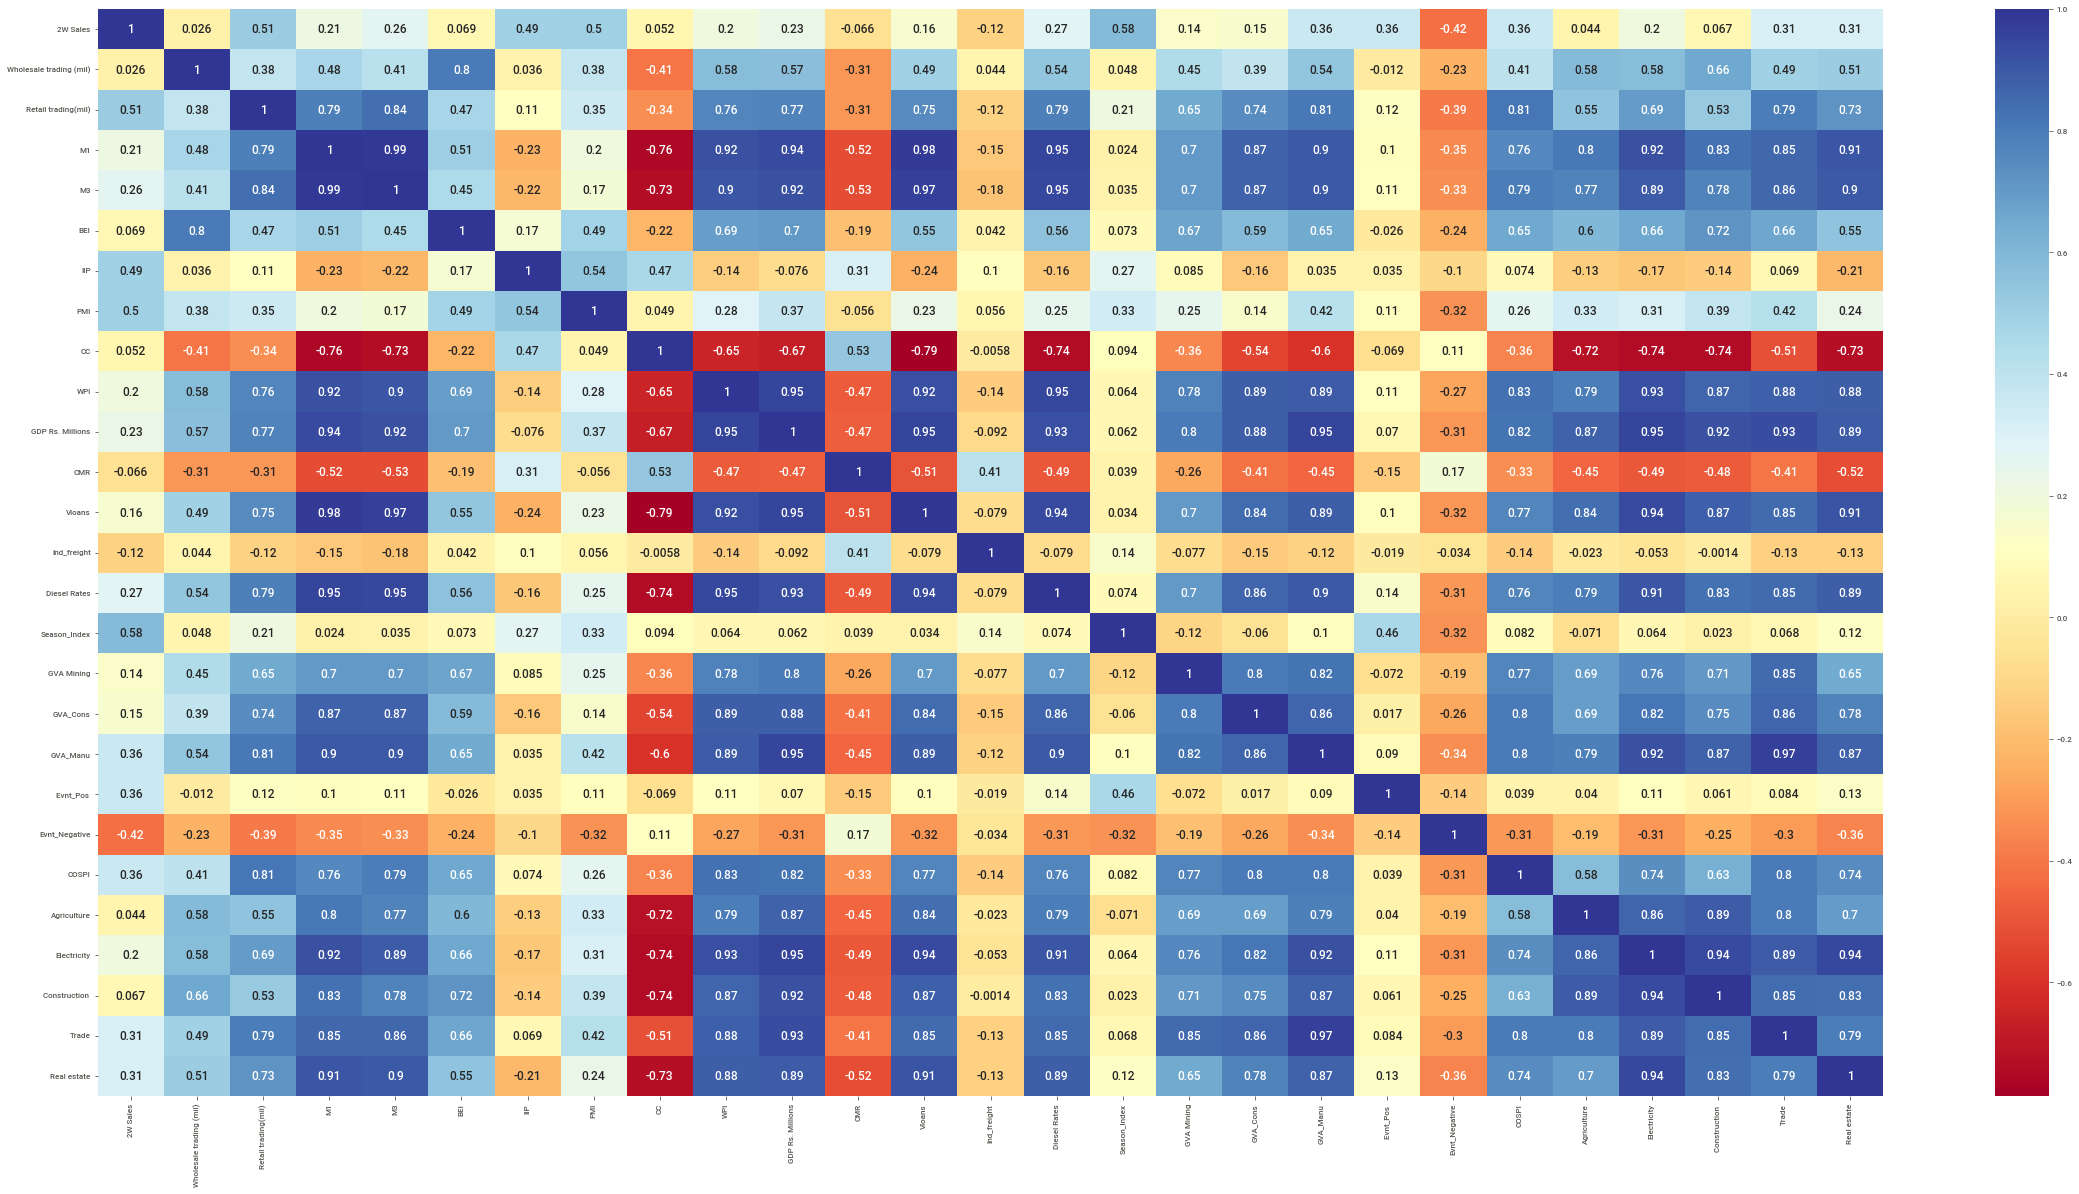

In [23]:
two_corr = twow_ds.corr()
x,y = plt.subplots(figsize=(40,20))
sns.heatmap(two_corr,cmap='RdYlBu',yticklabels=two_corr.columns,annot=True,annot_kws={'fontsize':12})
plt.show()

In [24]:
twow_ds.columns

Index(['2W Sales', 'Wholesale trading (mil)', 'Retail trading(mil)', 'M1',
       'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI', 'GDP Rs. Millions', 'CMR',
       'Vloans', 'Ind_freight', 'Diesel Rates', 'Season_Index', 'GVA Mining',
       'GVA_Cons', 'GVA_Manu', 'Evnt_Pos ', 'Evnt_Negative', 'COSPI',
       'Agriculture', 'Electricity', 'Construction ', 'Trade', 'Real estate'],
      dtype='object')

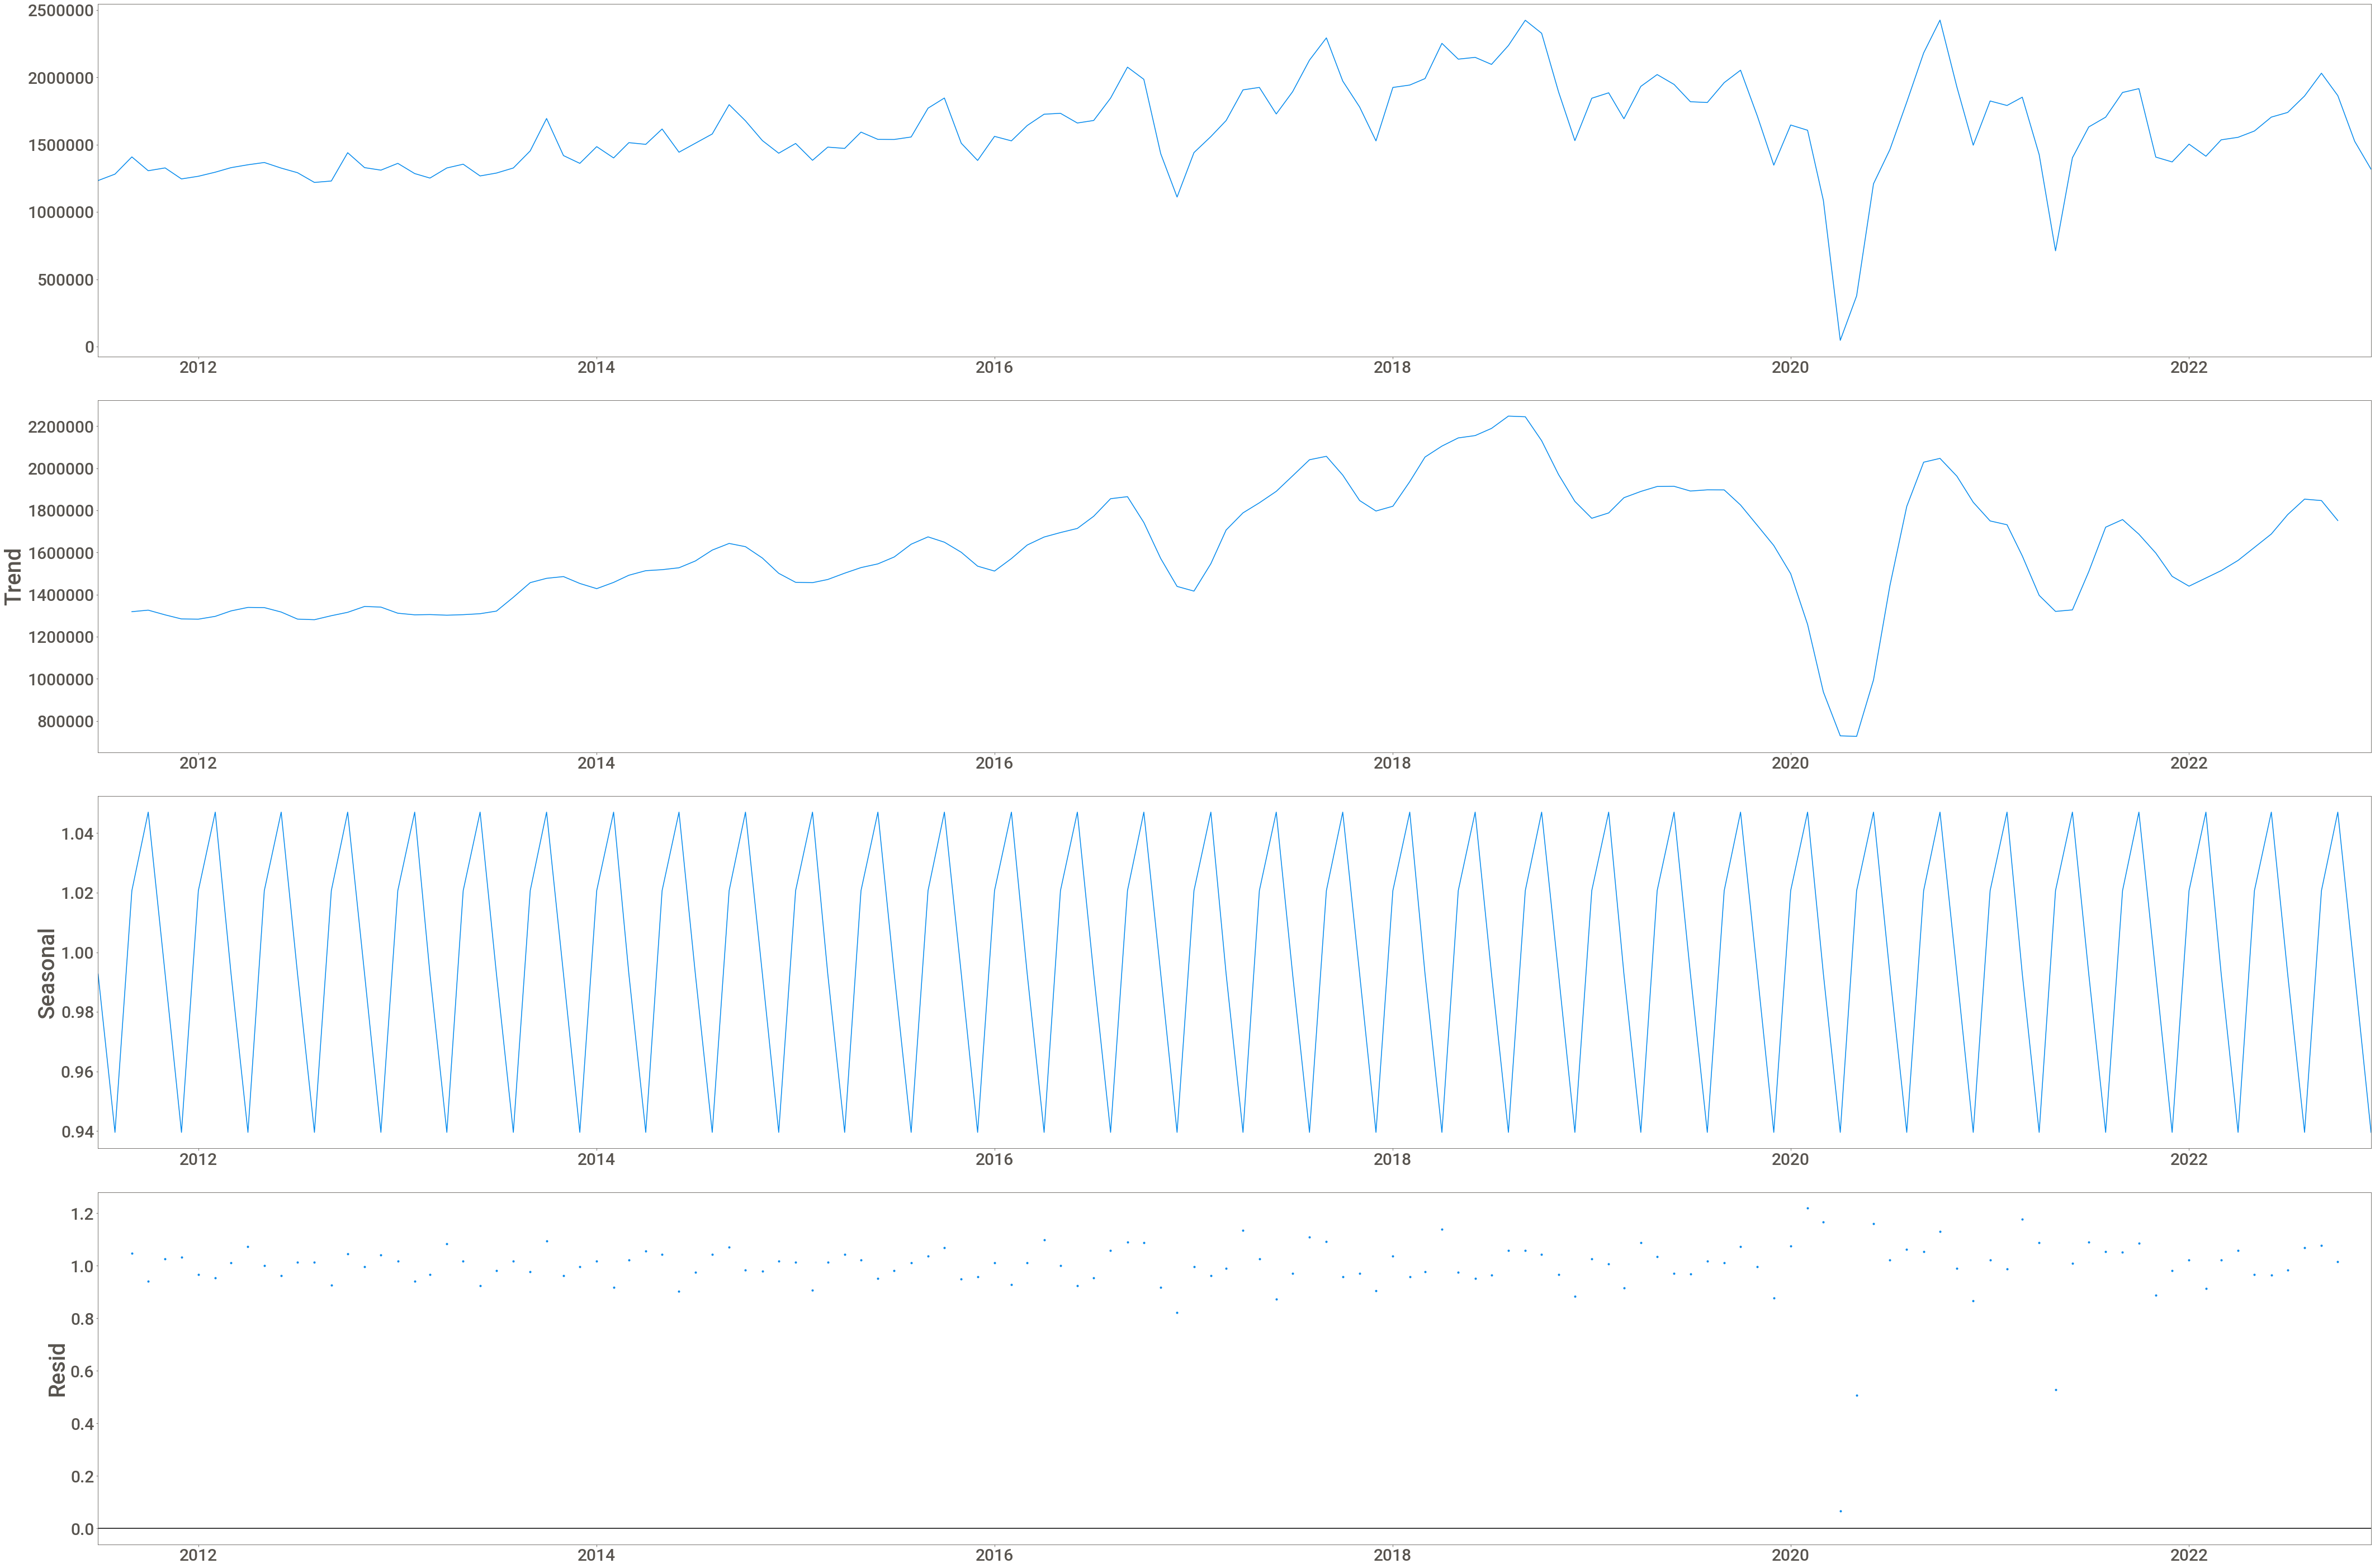

In [25]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
Twowheeler_Sales = twow_ds[['2W Sales']]
result = seasonal_decompose(Twowheeler_Sales, model='mulitplicative',period=4)
fig_size = plt.rcParams["figure.figsize"]
#plt.rcParams.update({'font.size': 22}
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
plt.rc('font', size=40)
fig_size[0] = 60
fig_size[1] = 40
result.plot(seasonal=True)
pyplot.show()

In [26]:
import dtale
dtale.show(twow_ds)

In [27]:
import sweetviz as sv

twowheller_report = sv.analyze(twow_ds)
twowheller_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [28]:
import pandas as pd
from pandas_profiling import ProfileReport

### Train and Test Split

In [29]:
twow_ds.columns

Index(['2W Sales', 'Wholesale trading (mil)', 'Retail trading(mil)', 'M1',
       'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI', 'GDP Rs. Millions', 'CMR',
       'Vloans', 'Ind_freight', 'Diesel Rates', 'Season_Index', 'GVA Mining',
       'GVA_Cons', 'GVA_Manu', 'Evnt_Pos ', 'Evnt_Negative', 'COSPI',
       'Agriculture', 'Electricity', 'Construction ', 'Trade', 'Real estate'],
      dtype='object')

In [30]:
X = twow_ds.drop('2W Sales', axis = 1)
Y = twow_ds[['2W Sales']]

In [31]:
X.columns

Index(['Wholesale trading (mil)', 'Retail trading(mil)', 'M1', 'M3', 'BEI',
       'IIP', 'PMI', 'CC', 'WPI', 'GDP Rs. Millions', 'CMR', 'Vloans',
       'Ind_freight', 'Diesel Rates', 'Season_Index', 'GVA Mining', 'GVA_Cons',
       'GVA_Manu', 'Evnt_Pos ', 'Evnt_Negative', 'COSPI', 'Agriculture',
       'Electricity', 'Construction ', 'Trade', 'Real estate'],
      dtype='object')

In [32]:
Y.columns

Index(['2W Sales'], dtype='object')

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
## This line instantiates the model. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1,shuffle=False)

In [34]:
rf = RandomForestRegressor(n_estimators=20) 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_train, y_train)

0.956376574272318

In [35]:
rf.score(X_test, y_test)

-0.1770830908627259

<AxesSubplot: xlabel='rf_feature_importances_', ylabel='feature'>

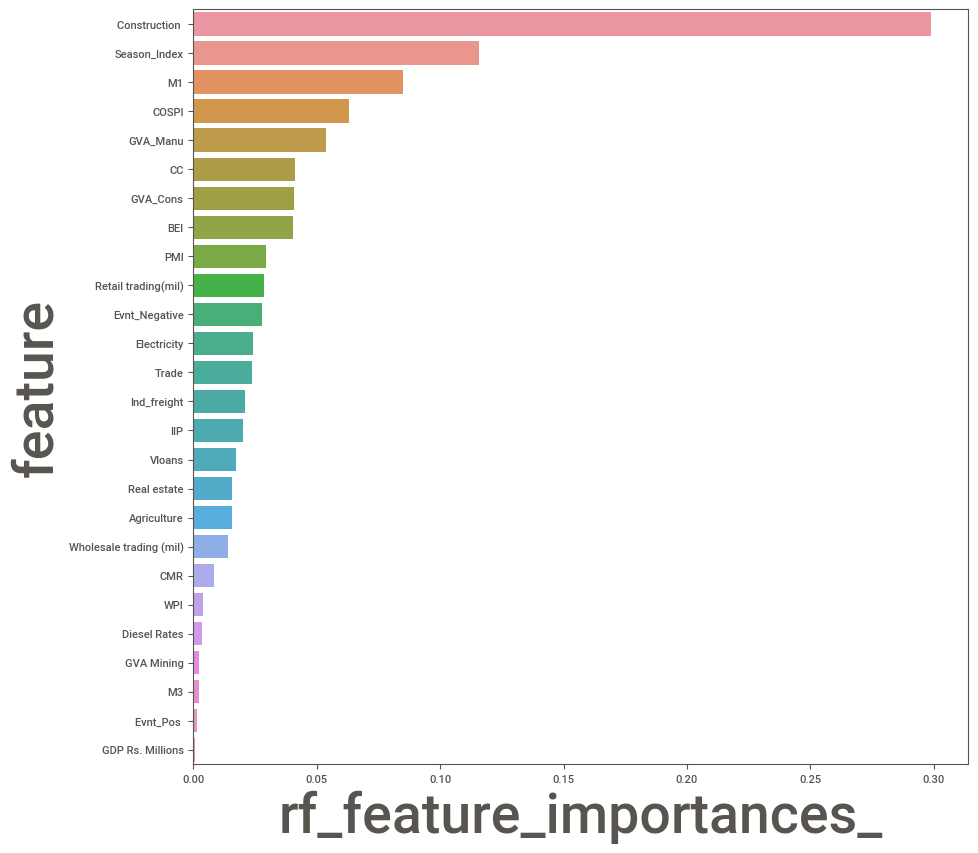

In [36]:
features_df = pd.DataFrame({'feature': X.columns,'rf_feature_importances_':rf.feature_importances_,})\
    .sort_values('rf_feature_importances_',ascending=False)\
    .reset_index()
#features_df.to_csv("HCV_RF2.csv")
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='rf_feature_importances_',y='feature',data=features_df)

In [37]:
param_test = {'max_depth':[3,5,7,8,9,10], 'min_samples_split':[2,3,4,5,6],
                'n_estimators':[100,200,400,600,800,1000], 'max_features': ['sqrt' , 'auto']}
gsearch = GridSearchCV(estimator = RandomForestRegressor(random_state=10),param_grid = param_test, scoring='r2',n_jobs=-1,cv=5)
gsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 400, 600, 800, 1000]},
             scoring='r2')

In [38]:
mod1=RandomForestRegressor(min_samples_split =gsearch.best_params_['min_samples_split'],\
                          n_estimators = gsearch.best_params_['n_estimators'], max_depth = gsearch.best_params_['max_depth']\
                          ,max_features=gsearch.best_params_['max_features'] ,n_jobs = -1,random_state=10)\
                        .fit(X_train,y_train)

RandomForestRegressor()

RandomForestRegressor()

In [39]:
features_df.to_csv(r'C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Indicators/features_2Wheeler.csv')

<AxesSubplot: xlabel='rf_feature_importances_', ylabel='feature'>

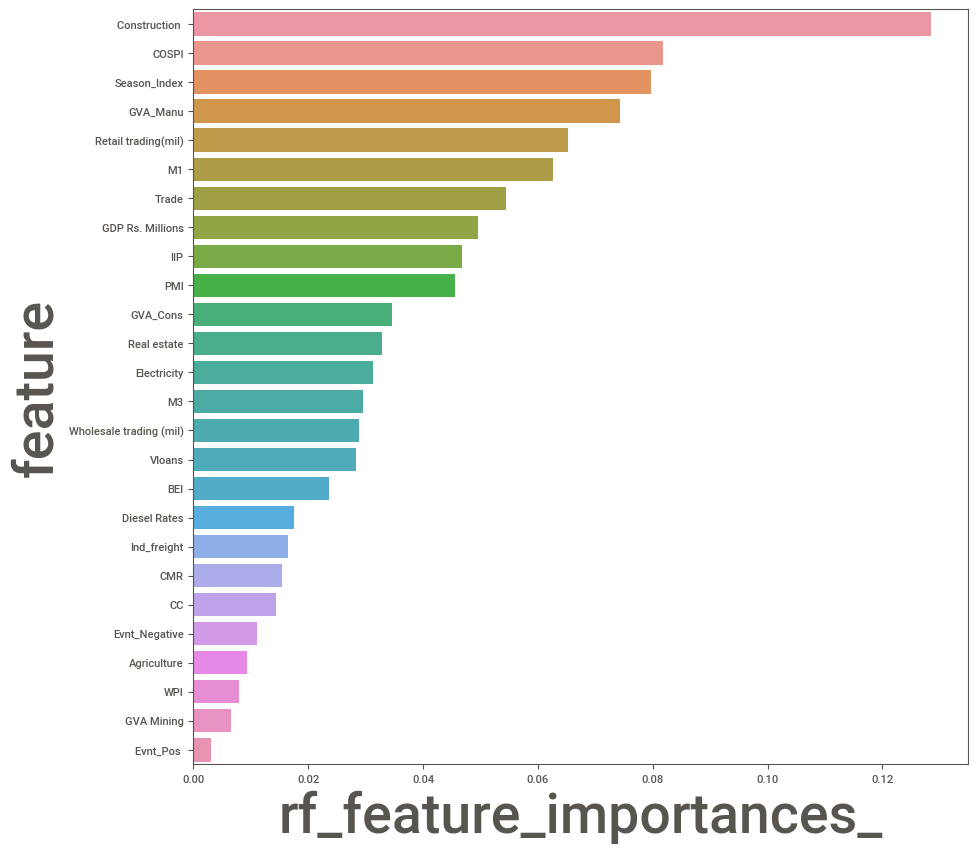

In [40]:
features_df = pd.DataFrame({'feature': X.columns,'rf_feature_importances_':mod1.feature_importances_,})\
    .sort_values('rf_feature_importances_',ascending=False)\
    .reset_index()
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='rf_feature_importances_',y='feature',data=features_df)

In [41]:
var1 = ['2W Sales', 'Wholesale trading (mil)', 'Retail trading(mil)', 'M1',
       'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI', 'GDP Rs. Millions', 'CMR',
       'Vloans', 'Ind_freight', 'Diesel Rates', 'Season_Index', 'GVA Mining',
       'GVA_Cons', 'GVA_Manu', 'Evnt_Pos ', 'Evnt_Negative', 'COSPI',
       'Agriculture', 'Electricity', 'Trade', 'Real estate']

In [255]:
var = ['2W Sales', 'Retail trading(mil)',
       'BEI_inv', 'IIP', 'PMI', 'Season_Index',
       'Evnt_Pos ', 'Evnt_Negative', 'COSPI']

In [256]:
#twow_ds['CMR_sqrt'] = np.sqrt(twow_ds['CMR'])

In [257]:
#twow_ds['M1_inv'] = 1/twow_ds['M1']

In [258]:
twow_ds['BEI_inv'] = 1/twow_ds['BEI']

In [259]:
#twow_ds['IIP_inv'] = 1/twow_ds['IIP']

In [260]:
twowheeler_before = twow_ds[var1]

In [261]:
twowheeler_after = twow_ds[var]

In [262]:
X1 = sm.tools.add_constant(twowheeler_before)
X2 = sm.tools.add_constant(twowheeler_after)

In [263]:
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after =  pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

In [264]:
print('DATA BEFORE')
print('-'*100)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(series_before)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                      10430.271273
2W Sales                      10.423175
Wholesale trading (mil)       11.559803
Retail trading(mil)           17.089891
M1                           141.480389
M3                           322.013742
BEI                           31.122638
IIP                            3.308925
PMI                            6.083430
CC                            17.252084
WPI                           47.286423
GDP Rs. Millions             132.976175
CMR                            2.249401
Vloans                       179.668133
Ind_freight                    2.463079
Diesel Rates                  40.828738
Season_Index                   2.974280
GVA Mining                     9.676727
GVA_Cons                      14.576432
GVA_Manu                      95.687502
Evnt_Pos                       1.821504
Evnt_Negative                  1.717755
COSPI                         17.681944
Agriculture                   23.523476
Electricity                  194.756495


In [265]:
print("DATA AFTER")
print('-'*100)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(series_after)

DATA AFTER
----------------------------------------------------------------------------------------------------


const                  1977.085475
2W Sales                  3.735441
Retail trading(mil)       3.745843
BEI_inv                   3.187620
IIP                       1.841616
PMI                       2.531564
Season_Index              1.858195
Evnt_Pos                  1.356588
Evnt_Negative             1.372153
COSPI                     4.843316
dtype: float64

In [266]:
X3 = twowheeler_after.drop('2W Sales', axis = 1)
Y3 = twowheeler_after[['2W Sales']]

In [267]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.20, random_state=1,shuffle=False)

In [268]:
X4 = sm.add_constant(X3)

# OLS model
ln_model = sm.OLS(Y3, X4)
twow_model = ln_model.fit()

In [269]:
print(tractor_model.summary())

                            OLS Regression Results                            
Dep. Variable:               2W Sales   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     44.11
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.37e-33
Time:                        16:42:07   Log-Likelihood:                -1865.1
No. Observations:                 138   AIC:                             3748.
Df Residuals:                     129   BIC:                             3775.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.059e+06   6

<AxesSubplot: >

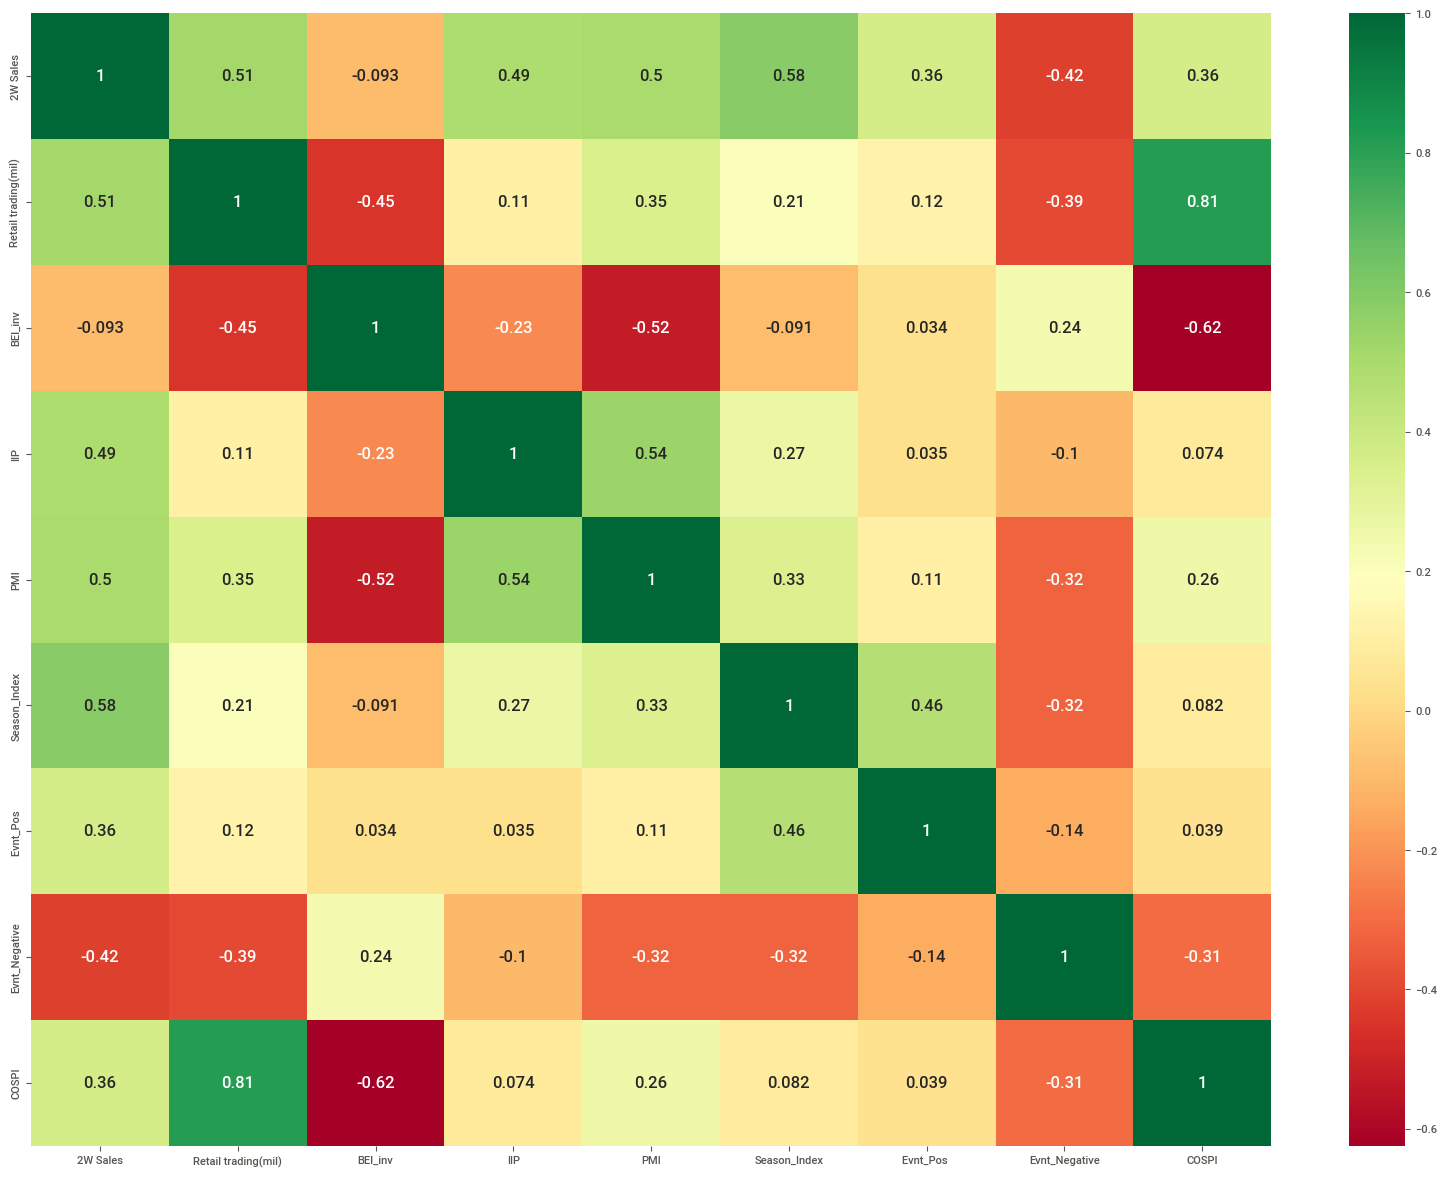

In [270]:
# calculate the correlation matrix
two_w1 = twowheeler_after.corr()
#cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
# display the correlation matrix
#display(corr)
f, ax = plt.subplots(figsize=(20, 15))
# plot the correlation heatmap
sns.heatmap(two_w1, xticklabels=two_w1.columns, yticklabels=two_w1.columns, cmap='RdYlGn',annot= True,annot_kws={'fontsize':12})

In [294]:
twow_for = pd.read_csv(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Fiinal Forecast\2Wheeler_Forecast_2023_2024.csv")

In [295]:
twow_for = twow_for.set_index('Date')

In [296]:
twow_for.columns

Index(['Const', 'Retail trading(mil)_upper', 'BEI_fitted', 'IIP_fitted',
       'PMI_fitted', 'Season_Index', 'Event_Pos', 'Event_Negative',
       'COSPI_upper'],
      dtype='object')

In [297]:
twow_for.head()

,Const,Retail trading(mil)_upper,BEI_fitted,IIP_fitted,PMI_fitted,Season_Index,Event_Pos,Event_Negative,COSPI_upper
Date,,,,,,,,,
Jan-23,1,88667.40281,134.264047,102.534841,56.986819,0.998766,0,0,24597281.46
Feb-23,1,90187.29376,134.043544,99.150965,54.560707,1.000127,0,0,24799564.31
Mar-23,1,90981.48732,133.825247,96.021586,52.518974,1.202582,0,0,24755623.85
Apr-23,1,85238.19079,132.357677,50.806218,43.853256,0.796020,0,0,26508373.47
May-23,1,85487.39827,132.143730,60.057481,45.057242,0.870706,0,0,26746208.93


In [298]:
X4

,Retail trading(mil),BEI_inv,IIP,PMI,Season_Index,Evnt_Pos,Evnt_Negative,COSPI
Date,,,,,,,,
2011-07-01,20086,0.008230,100.31,52.1,0.995435,0,0,2646905.3
2011-08-01,20086,0.008230,100.31,52.8,1.055094,0,0,2518331.2
2011-09-01,20086,0.008230,100.31,53.1,1.164526,0,0,2481991.1
2011-10-01,20882,0.008418,100.31,52.8,1.163147,0,0,2728697.7
2011-11-01,20882,0.008418,100.31,51.3,0.969692,0,0,2508661.5
...,...,...,...,...,...,...,...,...
2022-08-01,92687,0.007273,95.00,56.2,1.082447,0,0,18014419.1
2022-09-01,92687,0.007273,103.90,55.1,1.205671,1,0,18014419.1
2022-10-01,90246,0.007440,87.20,55.3,1.188338,0,0,23390488.1


In [299]:
twow_for['BEI_Inv'] = 1/twow_for['BEI_fitted']

In [300]:
twow_for.columns

Index(['Const', 'Retail trading(mil)_upper', 'BEI_fitted', 'IIP_fitted',
       'PMI_fitted', 'Season_Index', 'Event_Pos', 'Event_Negative',
       'COSPI_upper', 'BEI_Inv'],
      dtype='object')

In [301]:
twow_for

,Const,Retail trading(mil)_upper,BEI_fitted,IIP_fitted,PMI_fitted,Season_Index,Event_Pos,Event_Negative,COSPI_upper,BEI_Inv
Date,,,,,,,,,,
Jan-23,1,88667.40281,134.264047,102.534841,56.986819,0.998766,0,0,24597281.46,0.007448
Feb-23,1,90187.29376,134.043544,99.150965,54.560707,1.000127,0,0,24799564.31,0.007460
Mar-23,1,90981.48732,133.825247,96.021586,52.518974,1.202582,0,0,24755623.85,0.007472
Apr-23,1,85238.19079,132.357677,50.806218,43.853256,0.796020,0,0,26508373.47,0.007555
May-23,1,85487.39827,132.143730,60.057481,45.057242,0.870706,0,0,26746208.93,0.007568
Jun-23,1,85623.41076,131.931925,80.604045,50.465182,0.944056,0,0,26984517.16,0.007580
Jul-23,1,99060.90701,133.266753,84.862005,50.136765,0.938752,0,0,27408404.87,0.007504
Aug-23,1,99093.92001,133.058782,85.999401,52.107049,0.953332,0,0,27597945.01,0.007515
Sep-23,1,99100.88024,132.852886,95.316504,53.637922,1.060360,0,0,27730558.82,0.007527


In [302]:
frv = ['Const', 'Retail trading(mil)_upper', 'BEI_Inv',
       'IIP_fitted', 'PMI_fitted', 'Season_Index', 'Event_Pos',
       'Event_Negative', 'COSPI_upper']

In [303]:
ft_twow = twow_for[frv]

In [304]:
twow_for.shape

(24, 10)

In [305]:
ft_twow.shape

(24, 9)

In [306]:
ft_twow

,Const,Retail trading(mil)_upper,BEI_Inv,IIP_fitted,PMI_fitted,Season_Index,Event_Pos,Event_Negative,COSPI_upper
Date,,,,,,,,,
Jan-23,1,88667.40281,0.007448,102.534841,56.986819,0.998766,0,0,24597281.46
Feb-23,1,90187.29376,0.007460,99.150965,54.560707,1.000127,0,0,24799564.31
Mar-23,1,90981.48732,0.007472,96.021586,52.518974,1.202582,0,0,24755623.85
Apr-23,1,85238.19079,0.007555,50.806218,43.853256,0.796020,0,0,26508373.47
May-23,1,85487.39827,0.007568,60.057481,45.057242,0.870706,0,0,26746208.93
Jun-23,1,85623.41076,0.007580,80.604045,50.465182,0.944056,0,0,26984517.16
Jul-23,1,99060.90701,0.007504,84.862005,50.136765,0.938752,0,0,27408404.87
Aug-23,1,99093.92001,0.007515,85.999401,52.107049,0.953332,0,0,27597945.01
Sep-23,1,99100.88024,0.007527,95.316504,53.637922,1.060360,0,0,27730558.82


In [307]:
twow_f1 = twow_model.predict(ft_twow)

In [308]:
twow_f1

Date
Jan-23    1.993856e+06
Feb-23    1.918601e+06
Mar-23    1.993261e+06
Apr-23    1.178304e+06
May-23    1.344326e+06
Jun-23    1.705350e+06
Jul-23    1.757628e+06
Aug-23    1.837524e+06
Sep-23    2.032642e+06
Oct-23    2.228424e+06
Nov-23    1.921647e+06
Dec-23    1.997392e+06
Jan-24    2.066713e+06
Feb-24    2.055685e+06
Mar-24    2.245556e+06
Apr-24    1.507108e+06
May-24    1.523801e+06
Jun-24    1.785202e+06
Jul-24    1.987355e+06
Aug-24    2.007307e+06
Sep-24    2.176229e+06
Oct-24    2.210718e+06
Nov-24    2.115296e+06
Dec-24    2.160175e+06
dtype: float64

In [318]:
from decimal import Decimal
twow_f1.apply(Decimal)

Date
Jan-23     1993856.1537938746623694896697998046875
Feb-23    1918601.02872478798963129520416259765625
Mar-23     1993261.0217912918888032436370849609375
Apr-23    1178304.47891190391965210437774658203125
May-23     1344326.1997243217192590236663818359375
Jun-23     1705349.7944570579566061496734619140625
Jul-23    1757628.41253711632452905178070068359375
Aug-23     1837524.2768940362147986888885498046875
Sep-23    2032642.14879595558159053325653076171875
Oct-23     2228424.1093289698474109172821044921875
Nov-23    1921647.25238755554892122745513916015625
Dec-23    1997391.98324798070825636386871337890625
Jan-24    2066712.64560529286973178386688232421875
Feb-24    2055685.12336174095980823040008544921875
Mar-24     2245556.2957920269109308719635009765625
Apr-24       1507108.39260583557188510894775390625
May-24        1523801.3521801270544528961181640625
Jun-24       1785202.31545993126928806304931640625
Jul-24    1987355.09864168544299900531768798828125
Aug-24        2007307.1723

In [271]:
# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [272]:
y_predict = regression_model.predict(X_test)
predict = regression_model.predict(X_train)
# Show the first 12 predictions
train_mape = ((abs((y_train-predict)/y_train)).mean())*100
test_mape = ((abs((y_test-y_predict)/y_test)).mean())*100
print("Train Mape in % is ...", train_mape)
print("Test Mape in % is ...", test_mape)

Train Mape in % is ... 2W Sales    11.432457
dtype: float64
Test Mape in % is ... 2W Sales    28.154243
dtype: float64


In [273]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -2.586e+06
----------------------------------------------------------------------------------------------------
The Coefficient for Wholesale trading (mil) is 1.3
The Coefficient for Retail trading(mil) is 1.1e+08
The Coefficient for M1 is 3.8e+03
The Coefficient for M3 is 3.4e+04
The Coefficient for BEI is 6.5e+05
The Coefficient for IIP is 1.6e+05
The Coefficient for PMI is -6.3e+04
The Coefficient for CC is 0.056


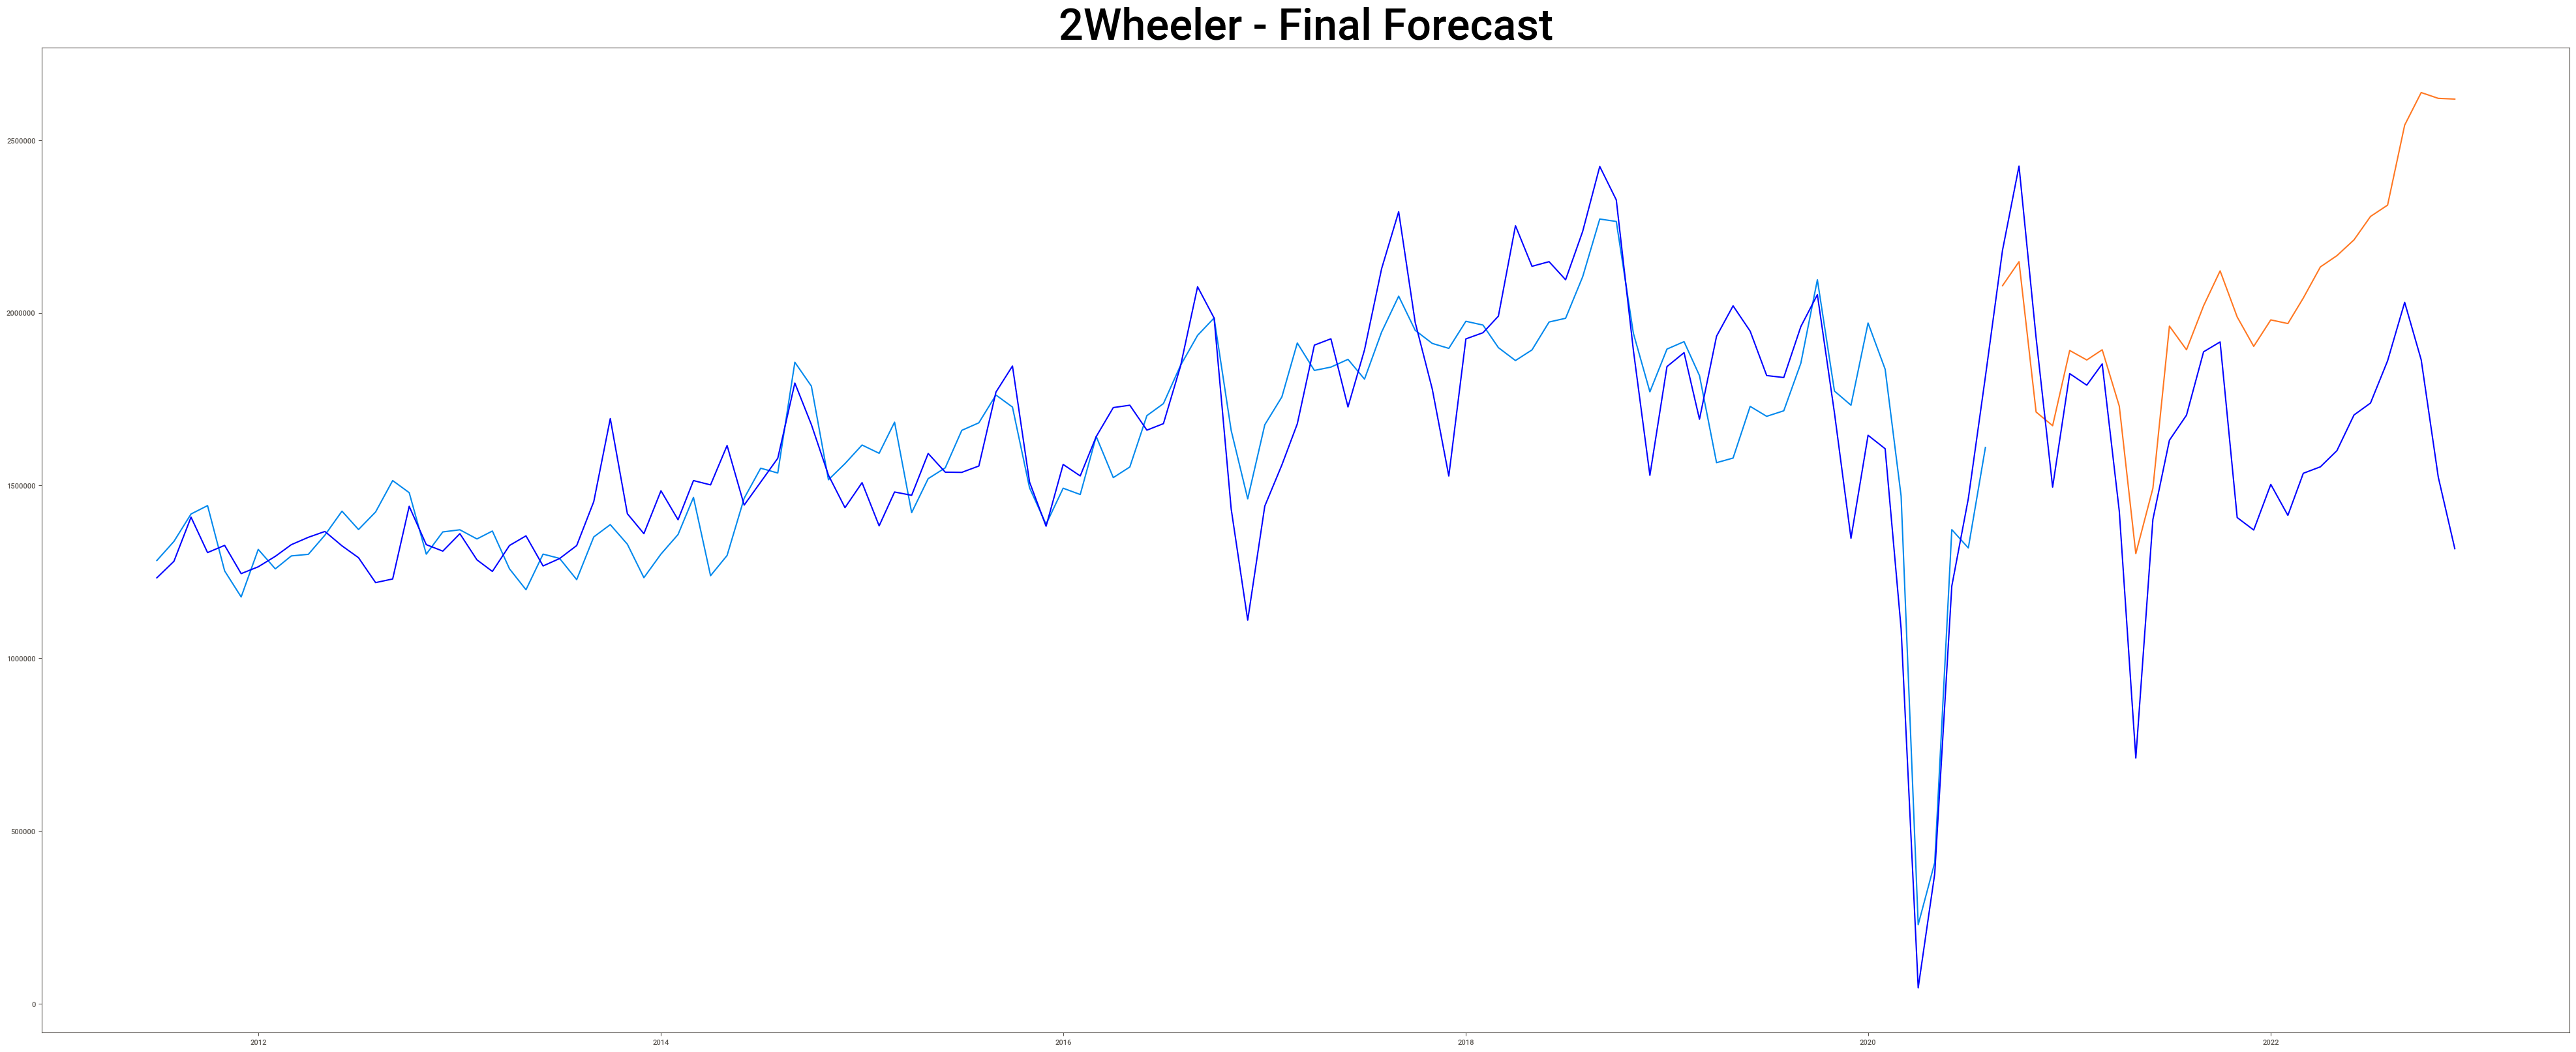

In [274]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 20
plt.plot(X_train.index,predict)
plt.plot(X_test.index,y_predict)
plt.plot(X.index,Y,color = 'blue')
plt.title("2Wheeler - Final Forecast")
plt.show()

In [275]:
from sklearn.preprocessing import MinMaxScaler
X4 = X3
scaler = MinMaxScaler()
print(scaler.fit(X4))
MinMaxScaler()
print(scaler.data_max_)
X5 = scaler.transform(X4)

MinMaxScaler()
[9.26870000e+04 1.00502513e-02 1.34700000e+02 5.89000000e+01
 1.36349226e+00 1.00000000e+00 1.00000000e+00 2.33904881e+07]


In [276]:
from sklearn.preprocessing import MinMaxScaler
Y4 = Y3
scaler = MinMaxScaler()
print(scaler.fit(Y4))
MinMaxScaler()
print(scaler.data_max_)
Y5 = scaler.transform(Y4)

MinMaxScaler()
[2424827.]


In [277]:
# Split X and y into X_
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X5_train, y5_train)

LinearRegression()

In [278]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X3.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -0.3336
----------------------------------------------------------------------------------------------------
The Coefficient for Retail trading(mil) is 0.086
The Coefficient for BEI_inv is 0.36
The Coefficient for IIP is 0.45
The Coefficient for PMI is 0.34
The Coefficient for Season_Index is 0.23
The Coefficient for Evnt_Pos  is 0.082
The Coefficient for Evnt_Negative is -0.054
The Coefficient for COSPI is 0.23
